# Q5 — Estimating convergence order, Leibniz series for π, and Aitken acceleration

We work with a convergent sequence $a_n \to a$ and errors $e_n = |a_n-a|$.  
Assume the model $e_{n+1} \approx M e_n^{q}$.

We estimate $M,q$, apply to the Leibniz series, and study Aitken acceleration.

In [1]:
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt

mp.mp.dps = 100

## Estimate formula

$q \approx \frac{\log(e_{n+2}/e_{n+1})}{\log(e_{n+1}/e_n)}$

$M \approx \frac{e_{n+1}}{e_n^q}$

In [2]:
def estimate_M_q(en, en1, en2):
    en = mp.mpf(en); en1 = mp.mpf(en1); en2 = mp.mpf(en2)
    q = mp.log(en2/en1) / mp.log(en1/en)
    M = en1 / (en**q)
    return M, q

## Leibniz partial sums for π

In [3]:
def leibniz_partial_sums(N):
    a = [mp.mpf('0')]*(N+1)
    s = mp.mpf('0')
    for k in range(N+1):
        term = mp.mpf(-1)**k / mp.mpf(2*k + 1)
        s += term
        a[k] = 4*s
    return a

N = 10002
a = leibniz_partial_sums(N)
pi = mp.pi
e = [abs(x-pi) for x in a]

n0 = 10000
M_est, q_est = estimate_M_q(e[n0], e[n0+1], e[n0+2])
print('q estimate:', q_est)
print('M estimate:', M_est)
print('ratio e_{n+1}/e_n:', e[n0+1]/e[n0])

q estimate: 0.9999000249945843123523714907359009089770693145957966411467122531647631995532946505081216005477200997
M estimate: 0.9989797220102322099742547485929531217929505912917876872226189108208901627424423437125984209892859345
ratio e_{n+1}/e_n: 0.9999000199965005249312594357222176264416731716737384550081851245283103083870300324150120076503261357


## Aitken acceleration

In [4]:
def aitken(seq):
    out = []
    for n in range(len(seq)-2):
        a0, a1, a2 = seq[n], seq[n+1], seq[n+2]
        denom = a2 - 2*a1 + a0
        if denom == 0:
            out.append(a0)
        else:
            out.append(a0 - (a1-a0)**2/denom)
    return out

N_plot = 10000
a_plot = a[:N_plot+1]
e_plot = [abs(x-pi) for x in a_plot]

a_tilde = aitken(a_plot)
e_tilde = [abs(x-pi) for x in a_tilde]

a_tilde2 = aitken(a_tilde)
e_tilde2 = [abs(x-pi) for x in a_tilde2]

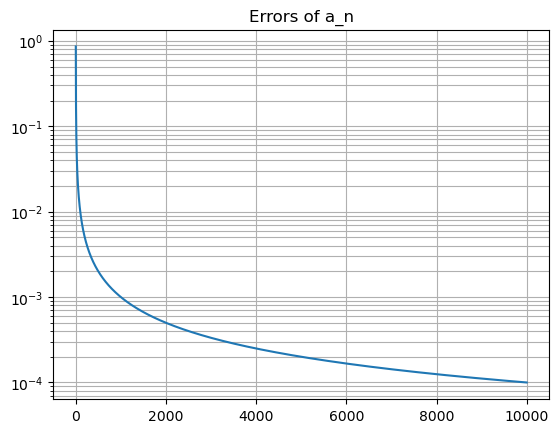

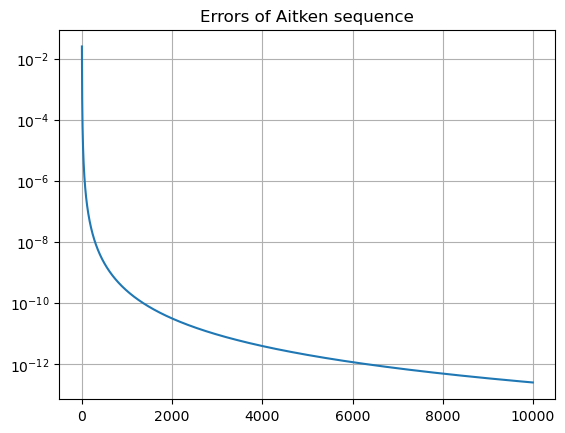

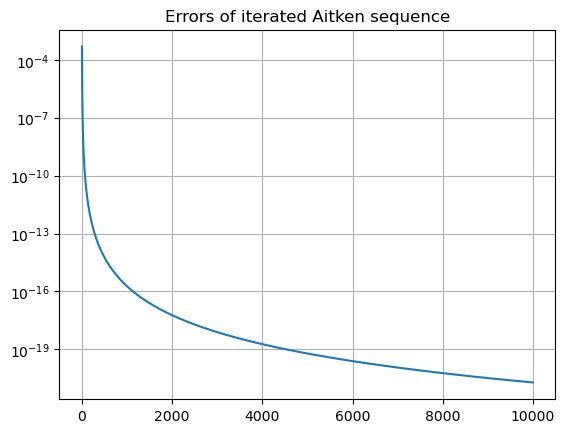

In [5]:
plt.figure()
plt.plot(range(len(e_plot)), [float(x) for x in e_plot])
plt.yscale('log')
plt.title('Errors of a_n')
plt.grid(True, which='both')
plt.show()

plt.figure()
plt.plot(range(len(e_tilde)), [float(x) for x in e_tilde])
plt.yscale('log')
plt.title('Errors of Aitken sequence')
plt.grid(True, which='both')
plt.show()

plt.figure()
plt.plot(range(len(e_tilde2)), [float(x) for x in e_tilde2])
plt.yscale('log')
plt.title('Errors of iterated Aitken sequence')
plt.grid(True, which='both')
plt.show()

## Estimate convergence order of accelerated sequences

In [6]:
n_tail = 9000
M1, q1 = estimate_M_q(e_tilde[n_tail], e_tilde[n_tail+1], e_tilde[n_tail+2])
M2, q2 = estimate_M_q(e_tilde2[n_tail], e_tilde2[n_tail+1], e_tilde2[n_tail+2])

print('Aitken q:', q1)
print('Iterated Aitken q:', q2)

Aitken q: 0.9998889320840234519133636980838538021959186217967869377483020878224401770309766655327787561786586867
Iterated Aitken q: 0.999888944421657352031955866203339232493599520226037497879748631094851028309303803676205053493115046
